# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
362745,0.6689,0.1709,0.2612,0.0122,0.0366,0.0928,0.4199,0.3857,0.1270,0.0317,3,3,13,13
471234,0.1123,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0.0928,0.1343,0.0024,0,0,0,0
362968,0.0122,0.0024,0.0024,0.0024,0.0024,0.0024,0.0879,0.1294,0.1831,0.0244,3,0,13,0
166371,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0220,0.0415,0.0024,0.0220,8,0,8,8
143035,0.0269,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0439,0.0024,0.0391,0,0,0,0


In [3]:
raw_data.shape

(471483, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

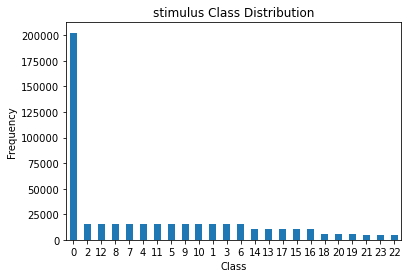

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
317130,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1172,0.0024,0.0171,0,0,0,0
126476,0.0635,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0220,0.0024,0.0024,0,0,0,0
12837,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0220,0.0024,0.0024,0,0,0,0
40167,0.0024,0.0024,0.0366,0.0024,0.0024,0.0024,0.4785,0.1147,0.0024,0.0659,8,8,5,5
372103,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0366,0.0366,0.1074,0.0098,0,0,0,0


In [12]:
raw_data.shape

(378535, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378535 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          378535 non-null  float64
 1   Emg2          378535 non-null  float64
 2   Emg3          378535 non-null  float64
 3   Emg4          378535 non-null  float64
 4   Emg5          378535 non-null  float64
 5   Emg6          378535 non-null  float64
 6   Emg7          378535 non-null  float64
 7   Emg8          378535 non-null  float64
 8   Emg9          378535 non-null  float64
 9   Emg10         378535 non-null  float64
 10  repetition    378535 non-null  int64  
 11  rerepetition  378535 non-null  int64  
 12  stimulus      378535 non-null  int64  
 13  restimulus    378535 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# T-distributed Stochastic Neighbor Embedding

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [18]:
from sklearn.manifold import TSNE
import time

In [19]:
start_time = time.time()


X_embedded = TSNE(n_components=3, learning_rate='auto',
                  init='random').fit_transform(X)

print ("Run Time is : ",time.time() - start_time, "seconds")

Run Time is :  15706.978743314743 seconds


In [20]:
X

array([[-0.27317502, -0.42035839, -0.40204271, ..., -0.56469259,
        -0.49876463, -0.27557549],
       [-0.30445309, -0.42035839, -0.40204271, ..., -0.58367969,
        -0.49876463, -0.30508328],
       [-0.31211303, -0.42035839, -0.40204271, ..., -0.58992202,
        -0.49876463, -0.33459107],
       ...,
       [-0.48382324, -0.42035839, -0.40204271, ..., -0.55819016,
         0.01268035, -0.46707503],
       [-0.48382324, -0.42035839, -0.40204271, ..., -0.56469259,
         0.02253162, -0.46707503],
       [-0.48382324, -0.42035839, -0.40204271, ..., -0.57743736,
         0.02253162, -0.46707503]])

In [21]:
X_embedded

array([[  0.5250851 ,  12.450674  ,  17.6933    ],
       [  1.0461867 ,  13.179574  ,  17.519136  ],
       [  1.0503743 ,  13.197898  ,  17.494621  ],
       ...,
       [ -1.0725702 , -52.5464    ,  15.138065  ],
       [ -0.84034765, -53.54999   ,  14.095306  ],
       [ -1.7929256 , -53.894924  ,  13.5070915 ]], dtype=float32)

In [22]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

In [23]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()

In [24]:
start_time = time.time()
tree.fit(X_train, y_train)
print ("Run Time is : ",time.time() - start_time, "seconds")

Run Time is :  3.169607400894165 seconds


In [25]:
start_time = time.time()
y_pred1 = tree.predict(X_test)
print ("Run Time is : ",time.time() - start_time, "seconds")

Run Time is :  0.049407243728637695 seconds


In [26]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 86.4966251469481


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     40005
           1       0.77      0.78      0.77      2108
           2       0.80      0.75      0.77      1923
           3       0.76      0.78      0.77      2110
           4       0.78      0.76      0.77      1957
           5       0.79      0.79      0.79      2046
           6       0.80      0.79      0.80      2187
           7       0.79      0.80      0.79      1753
           8       0.73      0.77      0.75      1740
           9       0.77      0.77      0.77      1876
          10       0.79      0.76      0.77      2030
          11       0.74      0.73      0.74      1940
          12       0.68      0.66      0.67      2123
          13       0.78      0.77      0.78      1332
          14       0.78      0.79      0.78      1226
          15       0.80      0.81      0.80      1161
          16       0.83      0.82      0.82      1543
 

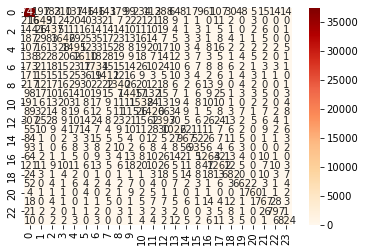

In [27]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [28]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.9190035267544613
MSE: 9.657138705799992
RMSE: 3.10759371633423


In [29]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8647341395672461
Recall Score :  0.864966251469481
f1_score :  0.8647879318596872


# KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()

In [31]:
start_time = time.time()
KNeighborsClassifier.fit(X_train, y_train)
print ("Run Time is : ",time.time() - start_time, "seconds")

Run Time is :  0.7076818943023682 seconds


In [32]:
start_time = time.time()
y_pred2 = KNeighborsClassifier.predict(X_test)
print ("Run Time is : ",time.time() - start_time, "seconds")

Run Time is :  3.205040454864502 seconds


In [33]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 88.54663373267994


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     40005
           1       0.82      0.80      0.81      2108
           2       0.86      0.74      0.80      1923
           3       0.82      0.77      0.80      2110
           4       0.80      0.77      0.79      1957
           5       0.82      0.79      0.80      2046
           6       0.85      0.79      0.82      2187
           7       0.85      0.78      0.81      1753
           8       0.83      0.77      0.80      1740
           9       0.81      0.77      0.79      1876
          10       0.86      0.76      0.81      2030
          11       0.78      0.74      0.76      1940
          12       0.78      0.67      0.72      2123
          13       0.82      0.74      0.78      1332
          14       0.79      0.79      0.79      1226
          15       0.85      0.79      0.82      1161
          16       0.86      0.83      0.84      1543
 

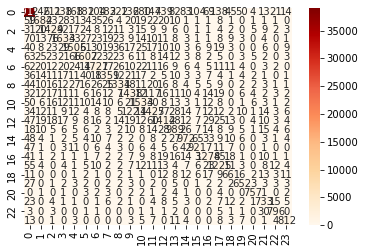

In [34]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [35]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.7596127174501698
MSE: 7.989776374707755
RMSE: 2.8266192482730594


In [36]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8826628178805196
Recall Score :  0.8854663373267994
f1_score :  0.8829932229986959


# ExtraTreesClassifier

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()

In [38]:
start_time = time.time()
extratree.fit(X_train, y_train)
print ("Run Time is : ",time.time() - start_time, "seconds")

Run Time is :  36.464926958084106 seconds


In [39]:
start_time = time.time()
y_pred5 = extratree.predict(X_test)
print ("Run Time is : ",time.time() - start_time, "seconds")

Run Time is :  8.842928647994995 seconds


In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 89.90714200800454


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     40005
           1       0.85      0.81      0.83      2108
           2       0.87      0.77      0.82      1923
           3       0.84      0.81      0.82      2110
           4       0.86      0.79      0.83      1957
           5       0.85      0.82      0.83      2046
           6       0.88      0.82      0.85      2187
           7       0.86      0.82      0.84      1753
           8       0.85      0.80      0.82      1740
           9       0.84      0.82      0.83      1876
          10       0.87      0.78      0.82      2030
          11       0.82      0.78      0.80      1940
          12       0.78      0.71      0.74      2123
          13       0.86      0.82      0.84      1332
          14       0.82      0.83      0.83      1226
          15       0.86      0.82      0.84      1161
          16       0.88      0.87      0.88      1543
 

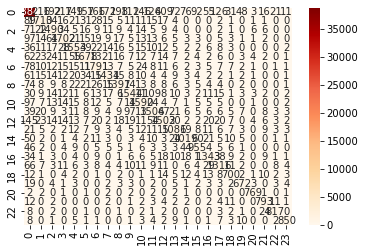

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.6837544744871676
MSE: 7.21659820095896
RMSE: 2.686372684673324


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.8972810528936583
Recall Score :  0.8990714200800455
f1_score :  0.8976031720310409


# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()

In [45]:
start_time = time.time()
RandomForestClassifier.fit(X_train, y_train)
print ("Run Time is : ",time.time() - start_time, "seconds")

Run Time is :  87.2829942703247 seconds


In [46]:
start_time = time.time()
y_pred3 = RandomForestClassifier.predict(X_test)
print ("Run Time is : ",time.time() - start_time, "seconds")

Run Time is :  4.7542266845703125 seconds


In [47]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 89.8529858533557


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     40005
           1       0.85      0.81      0.83      2108
           2       0.88      0.77      0.82      1923
           3       0.84      0.79      0.82      2110
           4       0.85      0.79      0.82      1957
           5       0.85      0.81      0.83      2046
           6       0.89      0.82      0.85      2187
           7       0.86      0.82      0.84      1753
           8       0.85      0.80      0.82      1740
           9       0.84      0.81      0.83      1876
          10       0.87      0.78      0.82      2030
          11       0.82      0.76      0.79      1940
          12       0.78      0.70      0.74      2123
          13       0.86      0.80      0.83      1332
          14       0.82      0.83      0.82      1226
          15       0.87      0.82      0.85      1161
          16       0.88      0.86      0.87      1543
 

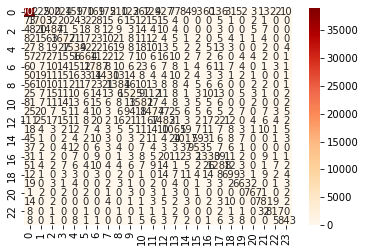

In [48]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [49]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.6862245234918832
MSE: 7.253543265484037
RMSE: 2.693240291077652


In [50]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.8965238510022415
Recall Score :  0.898529858533557
f1_score :  0.8967088845390576


# XGBoost

In [51]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [52]:
start_time = time.time()
xgb.fit(X_train, y_train)
print ("Run Time is : ",time.time() - start_time, "seconds")

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Run Time is :  618.0721018314362 seconds


In [53]:
start_time = time.time()
y_pred4 = xgb.predict(X_test)
print ("Run Time is : ",time.time() - start_time, "seconds")

Run Time is :  2.2812588214874268 seconds


In [54]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 83.64616217786994


Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     40005
           1       0.76      0.69      0.72      2108
           2       0.81      0.63      0.71      1923
           3       0.76      0.66      0.71      2110
           4       0.76      0.61      0.67      1957
           5       0.70      0.71      0.70      2046
           6       0.79      0.67      0.73      2187
           7       0.79      0.71      0.75      1753
           8       0.77      0.66      0.71      1740
           9       0.67      0.66      0.67      1876
          10       0.77      0.63      0.69      2030
          11       0.68      0.58      0.63      1940
          12       0.68      0.55      0.61      2123
          13       0.80      0.61      0.69      1332
          14       0.68      0.76      0.72      1226
          15       0.83      0.72      0.77      1161
          16       0.79      0.73      0.76      1543
 

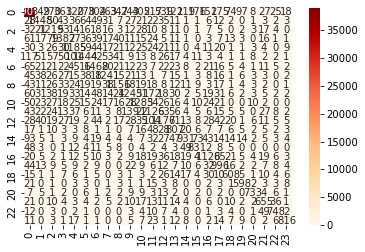

In [55]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [56]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.1227363387797693
MSE: 12.000145297000277
RMSE: 3.4641225868898284


In [57]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8303285970281015
Recall Score :  0.8364616217786994
f1_score :  0.8301674598905447


https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution#:~:text=You%20can%20use%20the%20Python,without%20knowing%20where%20to%20start.